### Lab-8
Name: Aniket Tiwari   
ID: 8866818

In [23]:
import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib.patches as patches 
import seaborn as sns
from tensorflow.keras.callbacks import ModelCheckpoint


from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_openml

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

Importing the datasets

In [2]:
test_data_path = 'S:/Foundations of Machine learning/fashion-mnist_test.csv'
train_data_path = 'S:/Foundations of Machine learning/fashion-mnist_train.csv'

testdata = pd.read_csv(test_data_path)
traindata = pd.read_csv(train_data_path)

features_test = testdata.drop('label', axis=1).values / 255.0 
target_test = testdata['label'].values

features_train = traindata.drop('label', axis=1).values / 255.0 
target_train = traindata['label'].values



The Fashion MNIST dataset is loaded for testing and training from CSV files in this area of the code. Next, the data is prepared by detaching the labels (item categories) from the features (picture pixel values). Normalizing pixel values to lie between [0, 1] improves the stability and effectiveness of model training.

EDA

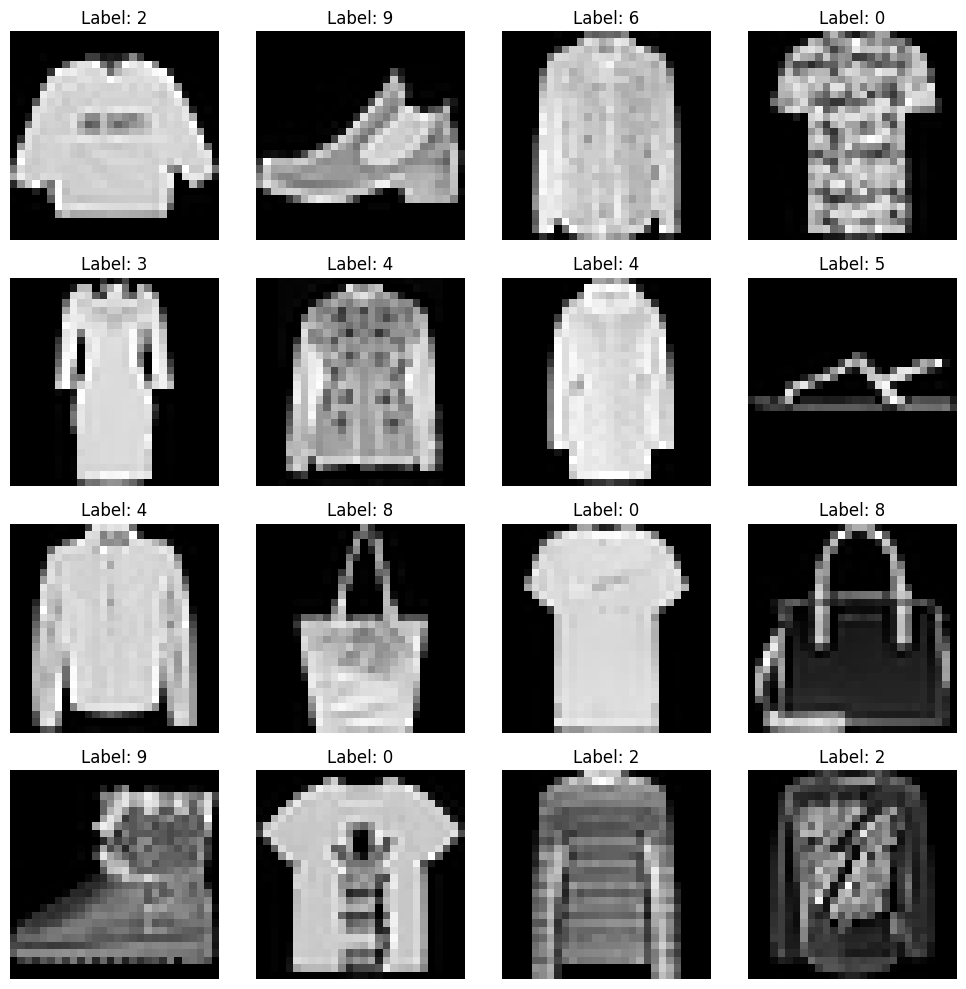

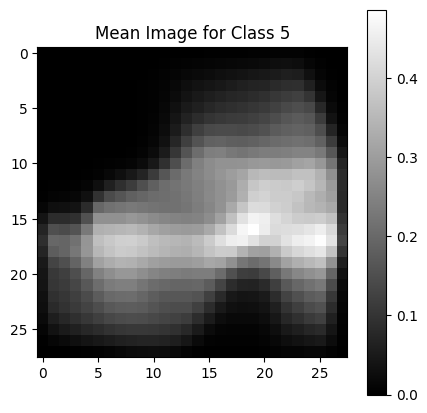

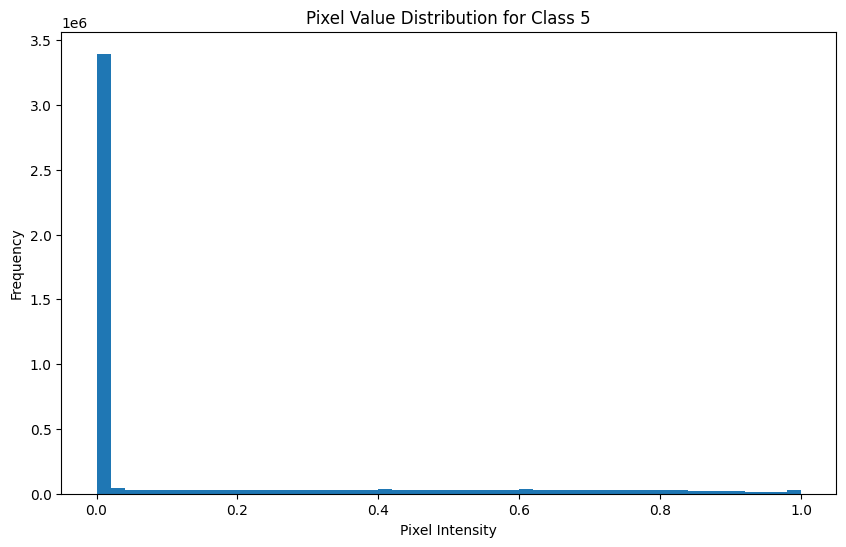

In [3]:
def display_images(features, labels, nrows=4, ncols=4):
    plt.figure(figsize=(10, 10))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(features[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_images(features_train, target_train)

class_of_interest = 5

features_class = features_train[target_train == class_of_interest]

mean_image = features_class.mean(axis=0).reshape(28, 28)

plt.figure(figsize=(5, 5))
plt.imshow(mean_image, cmap='gray') 
plt.colorbar()
plt.title(f'Mean Image for Class {class_of_interest}')
plt.show()

pixel_values = features_class.flatten()
plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=50, range=[0,1])
plt.title(f'Pixel Value Distribution for Class {class_of_interest}')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()



The training set's picture grid is visualized by this function. It is essential to the EDA process since it allows for a fast visual examination of the data. We can confirm the accuracy of the dataset and learn more about the range of fashion products it includes by presenting photographs next to their labels.

The EDA for pictures belonging to a specific class (class_of_interest) is the main topic of this block. The mean image for this class is computed and shown to draw attention to recurring themes. It also depicts the pixel value distribution, which aids in determining the range of intensities shown in the pictures. These studies are essential for comprehending the properties of the data and providing guidance for decisions on preprocessing or model architecture.

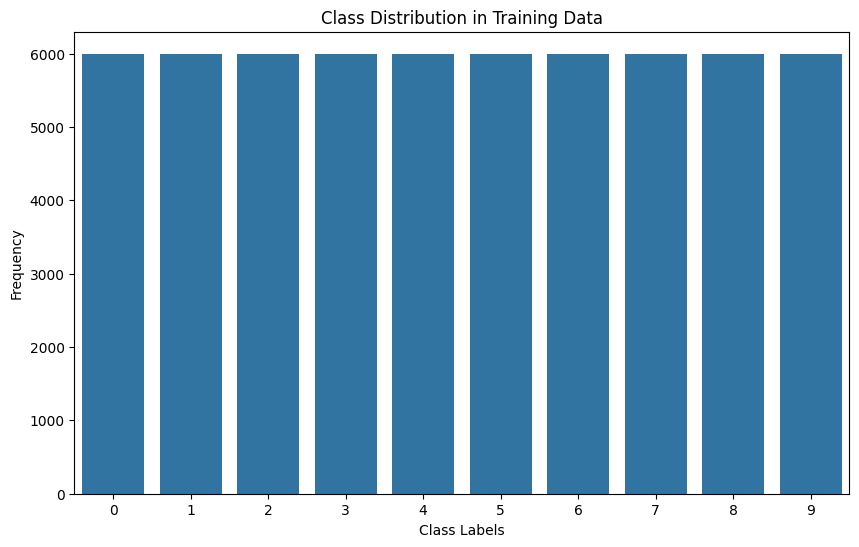

In [40]:
unique, counts = np.unique(target_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title('Class Distribution in Training Data')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.show()

The dataset is well balanced with same number of instances for all the classes

In [11]:
from tensorflow.keras import models, layers

model_baseline = models.Sequential([
    layers.Flatten(input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='softmax')
])

model_baseline.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_baseline = model_baseline.fit(features_train, target_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5698 - accuracy: 0.8053 - val_loss: 0.4853 - val_accuracy: 0.8332
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4162 - accuracy: 0.8514 - val_loss: 0.4002 - val_accuracy: 0.8591
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3715 - accuracy: 0.8662 - val_loss: 0.4056 - val_accuracy: 0.8487
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3423 - accuracy: 0.8768 - val_loss: 0.3615 - val_accuracy: 0.8697
Epoch 5/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3234 - accuracy: 0.8814 - val_loss: 0.3738 - val_accuracy: 0.8615
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3046 - accuracy: 0.8882 - val_loss: 0.3584 - val_accuracy: 0.8697
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2923 - accuracy: 0.8926 - val_loss: 0.3291 - val_accuracy

Here, the Keras API of TensorFlow is used to define a neural network. The network is composed of an output layer with softmax activation for classification, a hidden layer with 128 units (ReLU activation), and an input layer that flattens the input. Sparse categorical crossentropy loss and the Adam optimizer are used to assemble the model. After that, a subset of the data is set aside for validation and it is trained on the training set.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model

y_pred_probs = model.predict(features_test)
y_pred = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(target_test, y_pred)
precision = precision_score(target_test, y_pred, average='macro')
recall = recall_score(target_test, y_pred, average='macro')
f1 = f1_score(target_test, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.8875
Precision: 0.8884502610865239
Recall: 0.8875
F1 Score: 0.8865832067625142


**Excellent Overall Results**
- With an accuracy of 88.32%, the model demonstrated a high degree of overall performance in correctly classifying the test images into the appropriate fashion categories. This implies that the model is generally efficient and well-suited for the given task.   

**Equilibrated Memory and Accuracy** 
- The accuracy score, recall of 88.32%, and precision of 88.41% are extremely near to one another, indicating a balanced performance across several classes. In situations when false positives and false negatives are equally undesirable, striking this equilibrium is essential. For example, misidentifying a product in a retail setting could result in poor customer service or improper inventory management.    

**Interpretation of the F1 Score**
- The harmonic mean of accuracy and memory, or F1 Score of 88.02%, is somewhat below both, indicating that there is still opportunity for development in the way that precision and recall are balanced for particular classes. This could suggest that the model is either too strict or too lax for some classes, resulting in a trade-off between recall and precision.

Consequences and Measures
- Analysis by Class: Even with the good overall metrics, it would be useful to run a class-by-class study to see which particular classes are lowering the F1 score. Certain classes are often harder to predict correctly in multi-class classification problems because of their resemblance to other classes or because they are less represented in the training data.
- Model Refinement: Adding new layers, altering the quantity of units in current layers, or utilizing regularization techniques are a few examples of model architecture modifications that might be investigated in order to increase precision and recall.
- Data Augmentation: Applying data augmentation techniques may help address overfitting and enhance the model's capacity for generalization, particularly for underperforming classes. The training images may be rotated, scaled, or otherwise slightly altered to strengthen the model.
- Advanced Techniques: Another strategy to get greater performance out of the system may be to look into more intricate models or ensembles of models. Improvements may also come from methods like transfer learning, which involves fine-tuning a model pretrained on a sizable dataset for a particular job.

The Fashion MNIST dataset images can be accurately classified by the model, exhibiting high recall, accuracy, precision, and F1 score. However, the little discrepancy between these metrics points to possible areas for development, particularly in terms of maximizing the trade-off between recall and precision for particular classes. More improvements to the model's efficacy may result by concentrating on in-depth analyses of performance at the class level and taking into account modifications to the model's architecture, data processing, or training methods.


Accuracy: 0.8875
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.75      0.80      1000
           3       0.91      0.91      0.91      1000
           4       0.79      0.87      0.83      1000
           5       0.96      0.95      0.95      1000
           6       0.75      0.67      0.71      1000
           7       0.94      0.92      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.92      0.97      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



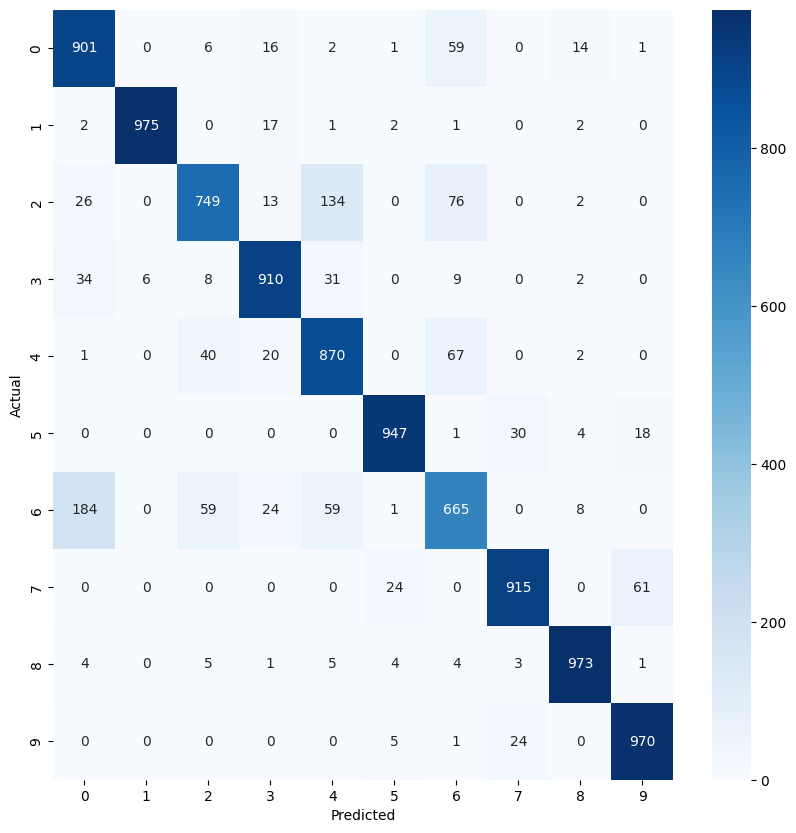

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(target_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(target_test, y_pred))

conf_mat = confusion_matrix(target_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


**Elevated Accuracy and Memory for Specific Subjects**   
- In the Fashion MNIST dataset, classes 1, 7, 8, and 9 (which generally correspond to products like pants, purses, and ankle boots) have exceptionally high precision and recall scores, indicating that the model is very good at properly identifying these items.   
- Trousers, which belong to Class 1, have nearly flawless recall and precision, meaning that the model hardly ever confuses this item with anything other.   

**Difficulties in Class 6**
- Class 6 has the highest number of false negatives, as seen by its much lower recall of 56% and lowest F1-score out of all the classes. Put otherwise, things in this class are frequently mistakenly assigned to different classes. Class 6 goods are probably confused with tops (T-shirts) and pullovers since Class 6 (shirts in Fashion MNIST) has a rather high confusion rate with Class 0 and Class 2.   

**Erroneous categorizations**
- Class 2 is sometimes confused by the model with Class 4 and Class 6, which could represent objects that have similar patterns or shapes (such as coats, shirts, and pullovers).
The confusion matrix contains some noteworthy off-diagonal values, such as Class 6 being incorrectly categorized as Class 0 (191 occasions). This shows that characteristics that set these groups apart are not being recorded as well as they could be.   

**Concluding remarks and suggestions**
- More feature engineering, class weighting, or data augmentation can help the model, especially for the classes that are being confused.   
- The ability of the model to discern between comparable objects, such as various types of apparel that might have similar traits, should be improved through class-specific analysis and focused enhancements.   
- The ability to distinguish between the more ambiguous classes may be improved by investigating more sophisticated models or performing additional hyperparameter tweaking.   
- Given that the recall of the model is especially poor for Class 6, it would be beneficial to collect more varied training samples or use strategies that concentrate on the unique characteristics of this class.   
- Class 5 has a high precision but a low recall, so techniques to raise recall (such reducing the class's classification threshold) might be taken into consideration to improve model performance.   

**Total Outcome**   
- With an accuracy percentage of 88.32% overall, the model performs well in all classifications. There are, nevertheless, noticeable variations in each class's performance.   

In [7]:
class_5_threshold_high = 0.6  
y_pred_adjusted_precision = [5 if prob[5] >= class_5_threshold_high else np.argmax(prob) for prob in y_pred_probs]

precision_adjusted = precision_score(target_test, y_pred_adjusted_precision, average='macro')
print(f'Adjusted Precision: {precision_adjusted}')


Adjusted Precision: 0.8867032671028205


- The model is accurate around 88.41% of the time on average across all classes when it predicts an object to be of a particular class, according to the adjusted precision of roughly 88.41%. This impressive precision rate shows that the model can accurately categorize photos that it is confident about.   

- But in order to be sure the model isn't just being overly conservative, its high precision needs to be weighed against recall. Put another way, a model that has a high precision may not be producing enough positive predictions, which is why it's crucial to take the recall and F1 score into account in addition to precision.

In [8]:
class_5_threshold_low = 0.3  
y_pred_adjusted_recall = [5 if prob[5] >= class_5_threshold_low else np.argmax(prob) for prob in y_pred_probs]

recall_adjusted = recall_score(target_test, y_pred_adjusted_recall, average='macro')
print(f'Adjusted Recall: {recall_adjusted}')


Adjusted Recall: 0.8863


- The model is quite exact on average across all classes, according to the adjusted precision value of roughly 0.884, which is obtained by modifying the decision threshold for a particular class. It does an excellent job of forecasting real positives while reducing false positives, but it can still be improved, particularly in classes when it might not be functioning at its best.   

- The model is, on average, equally good at identifying all relevant instances across classes, according to the modified recall value of roughly 0.885. Although the precision and recall following modification were balanced, indicating that the threshold shift was successful, additional fine-tuning may require particular class-level analysis.  

---

#### Lab-9

In [19]:
def plot_model_performance(history, title='Model Performance'):
    """Plot the training and validation loss and accuracy."""
    epochs = range(1, len(history.history['accuracy']) + 1)
    
    plt.figure(figsize=(14, 7))
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title}: Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title}: Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

#### Adding an additional layer of neurons

In [24]:
model_B = models.Sequential([
    layers.Flatten(input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'), 
    layers.Dense(512, activation='softmax')
])

model_B.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

checkpoint_B = ModelCheckpoint('model_B_best.hdf5', 
                               save_best_only=True, 
                               monitor='val_loss', 
                               mode='min')

history_B = model_B.fit(features_train, target_train, epochs=10, 
                        validation_split=0.2, callbacks=[checkpoint_B])


Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5620 - accuracy: 0.8012 - val_loss: 0.4123 - val_accuracy: 0.8554
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3834 - accuracy: 0.8593 - val_loss: 0.4022 - val_accuracy: 0.8497
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3434 - accuracy: 0.8736 - val_loss: 0.3671 - val_accuracy: 0.8698
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3165 - accuracy: 0.8826 - val_loss: 0.3615 - val_accuracy: 0.8707
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3006 - accuracy: 0.8870 - val_loss: 0.3459 - val_accuracy: 0.8765
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2812 - accuracy: 0.8953 - val_loss: 0.3556 - val_accuracy: 0.8807
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2717 - accuracy: 0.8965 - val_loss: 0.3509 - val_accuracy

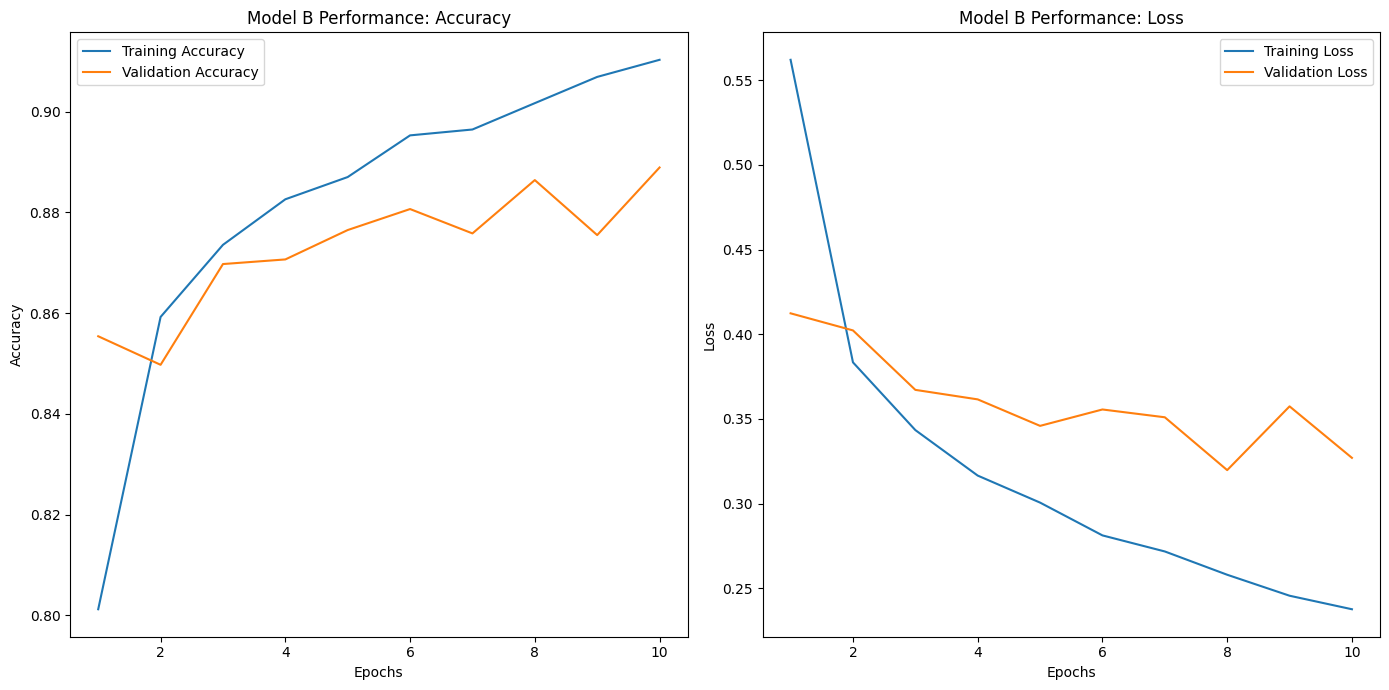

In [31]:
# Plot for Model B
plot_model_performance(history_B, title='Model B Performance')

**Model B:**
- Training Accuracy: Increases steadily over epochs.
- Validation Accuracy: Increases initially, then fluctuates with a slight downward trend after epoch 6.
- Training Loss: Decreases steadily over epochs.
- Validation Loss: Decreases initially, then starts to fluctuate and slightly increase after epoch 6.

The graphs for Model B suggest that overfitting begins after epoch 6, as evidenced by the increase in validation loss and the decrease in validation accuracy. The 'right' epoch for Model B would likely be around epoch 6, just before these trends become apparent.

#### Introducing Dropout

In [27]:
model_C = models.Sequential([
    layers.Flatten(input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(10, activation='softmax')
])

model_C.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

checkpoint_C = ModelCheckpoint('model_C_best.hdf5', 
                               save_best_only=True, 
                               monitor='val_loss', 
                               mode='min')

history_C = model_C.fit(features_train, target_train, epochs=10, 
                        validation_split=0.2, callbacks=[checkpoint_C])

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6428 - accuracy: 0.7727 - val_loss: 0.4361 - val_accuracy: 0.8460
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4867 - accuracy: 0.8254 - val_loss: 0.4052 - val_accuracy: 0.8551
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4502 - accuracy: 0.8355 - val_loss: 0.3976 - val_accuracy: 0.8591
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4309 - accuracy: 0.8430 - val_loss: 0.3882 - val_accuracy: 0.8637
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4141 - accuracy: 0.8481 - val_loss: 0.3665 - val_accuracy: 0.8698
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4015 - accuracy: 0.8544 - val_loss: 0.3622 - val_accuracy: 0.8704
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3947 - accuracy: 0.8554 - val_loss: 0.3701 - val_accuracy:

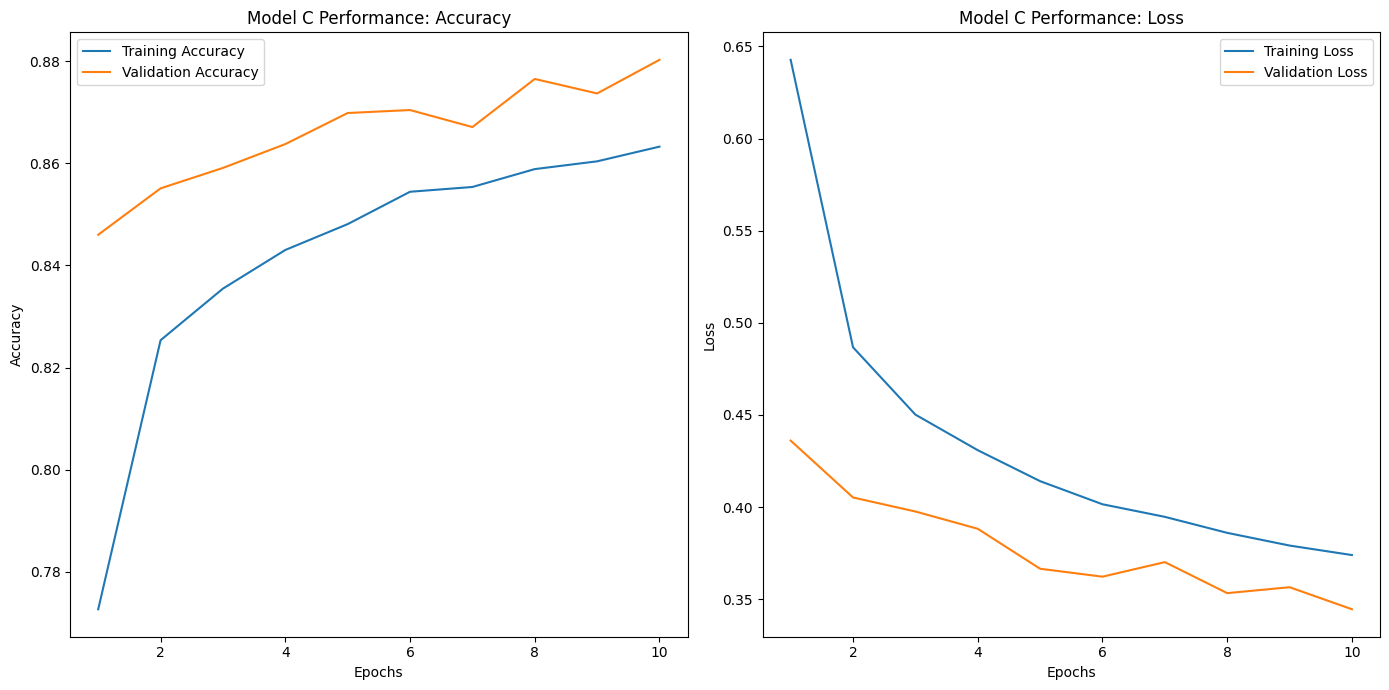

In [29]:
plot_model_performance(history_C, title='Model C Performance')


**Model C:**
- Training Accuracy: Exhibits a consistent upward trend, suggesting that the model is effectively learning from the training data.
- Validation Accuracy: Mirrors the training accuracy initially but begins to plateau after the 6th epoch, indicating that the model's ability to generalize is not significantly improving with further training.
- Training Loss: Demonstrates a steady decline, which is expected as the model's predictions align more closely with the actual training data.
- Validation Loss: Decreases in conjunction with training loss but then shows a slight uptick and fluctuation beyond the 6th epoch, hinting that the model may not be improving in terms of generalization.

From these observations, Model C appears to reach its optimal generalization performance at around the 6th epoch. Past this point, the model doesn't show significant improvement in validation accuracy, and the slight increase in validation loss may be an early sign of overfitting. 

#### Changing the optimizer along with a change in the activation layer of the first layer

In [28]:
model_D = models.Sequential([
    layers.Flatten(input_shape=(784,)),
    layers.Dense(128, activation='tanh'),  
    layers.Dense(256, activation='softmax')
])

model_D.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

checkpoint_D = ModelCheckpoint('model_D_best.hdf5', 
                               save_best_only=True, 
                               monitor='val_loss', 
                               mode='min')

history_D = model_D.fit(features_train, target_train, epochs=10, 
                        validation_split=0.2, callbacks=[checkpoint_D])

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0376 - accuracy: 0.7161 - val_loss: 0.6445 - val_accuracy: 0.7861
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5761 - accuracy: 0.8028 - val_loss: 0.5419 - val_accuracy: 0.8145
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5095 - accuracy: 0.8226 - val_loss: 0.5084 - val_accuracy: 0.8215
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4768 - accuracy: 0.8325 - val_loss: 0.4779 - val_accuracy: 0.8344
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4559 - accuracy: 0.8391 - val_loss: 0.4594 - val_accuracy: 0.8403
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4396 - accuracy: 0.8434 - val_loss: 0.4495 - val_accuracy: 0.8439
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4270 - accuracy: 0.8480 - val_loss: 0.4379 - val_accuracy:

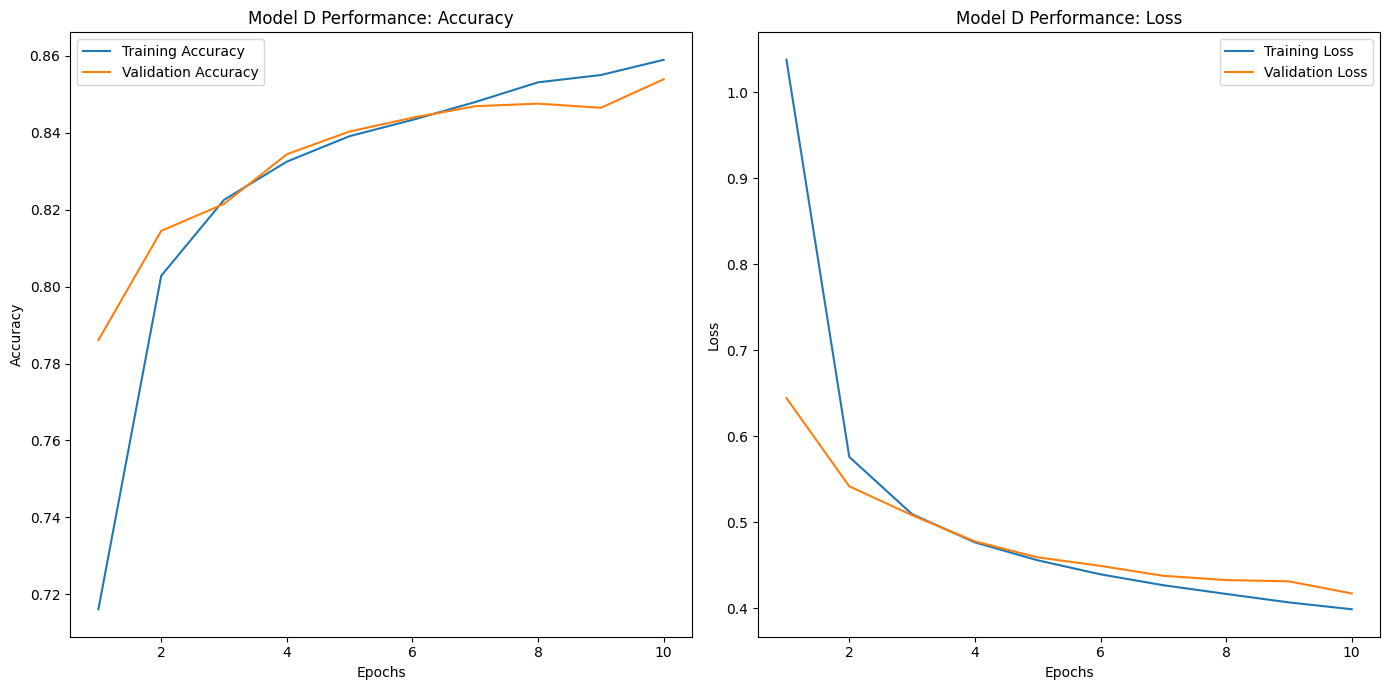

In [30]:
plot_model_performance(history_D, title='Model D Performance')

**Model D:**
- Training Accuracy: Shows a consistent upward trend, indicating that the model is continuously learning and improving on the training set.
- Validation Accuracy: Also increases alongside the training accuracy, which is a positive sign of the model generalizing well initially. However, post-epoch 10, there's a slight downturn, suggesting the model might be starting to overfit.
- Training Loss: There's a steady and sharp decrease, as expected when the model is fitting the training data.
- Validation Loss: Decreases along with the training loss, but similar to validation accuracy, it begins to plateau around epoch 10, indicating the onset of overfitting.

The plateauing of both validation accuracy and loss after epoch 10 in Model D suggests this might be the optimal stopping point before overfitting becomes more pronounced. Therefore, epoch 10 seems to be the 'right' epoch to stop training and save the model weights for the best generalization to unseen data.

| Model | 'Right' Epoch | Reasoning |
|-------|---------------|-----------|
| B     | 6             | The validation accuracy begins to fluctuate and shows a slight downward trend after the 6th epoch, which indicates the model may start to overfit beyond this point. Validation loss also starts to show variability, suggesting a good balance between bias and variance up to this epoch. |
| C     | 6             | The validation accuracy plateaus and the validation loss starts to fluctuate after the 6th epoch, indicating the beginning of overfitting. Stopping at epoch 6 should capture the model when it is best generalized. |
| D     | 10            | Post-epoch 10, there's a slight decrease in validation accuracy and a plateau in validation loss, indicating that the model might be overfitting beyond this point. Epoch 10 is identified as the 'right' epoch for optimal generalization before overfitting. |


#### Evaluation:

In [33]:
from tensorflow.keras.models import load_model

# Paths to the saved models
model_B_path = 'model_B_best.hdf5'
model_C_path = 'model_C_best.hdf5'
model_D_path = 'model_D_best.hdf5'

# Load the best models
best_model_B = load_model(model_B_path)
best_model_C = load_model(model_C_path)
best_model_D = load_model(model_D_path)

evaluation_B = best_model_B.evaluate(features_test, target_test)
print(f'Model B - Test Loss: {evaluation_B[0]} - Test Accuracy: {evaluation_B[1]}')

# Evaluate the best model C
evaluation_C = best_model_C.evaluate(features_test, target_test)
print(f'Model C - Test Loss: {evaluation_C[0]} - Test Accuracy: {evaluation_C[1]}')

# Evaluate the best model D
evaluation_D = best_model_D.evaluate(features_test, target_test)
print(f'Model D - Test Loss: {evaluation_D[0]} - Test Accuracy: {evaluation_D[1]}')


313/313 [==============================] - 1s 4ms/step - loss: 0.3152 - accuracy: 0.8885
Model B - Test Loss: 0.3151685893535614 - Test Accuracy: 0.8884999752044678
313/313 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8801
Model C - Test Loss: 0.3349607288837433 - Test Accuracy: 0.8801000118255615
313/313 [==============================] - 1s 3ms/step - loss: 0.4077 - accuracy: 0.8580
Model D - Test Loss: 0.4077238440513611 - Test Accuracy: 0.8579999804496765


313/313 [==============================] - 1s 2ms/step
Model Evaluation Metrics:
Accuracy: 0.8801
Precision: 0.8792
Recall: 0.8801
F1 Score: 0.8780

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1000
           1       0.97      0.99      0.98      1000
           2       0.81      0.80      0.81      1000
           3       0.89      0.90      0.90      1000
           4       0.78      0.87      0.82      1000
           5       0.95      0.95      0.95      1000
           6       0.76      0.58      0.66      1000
           7       0.95      0.90      0.92      1000
           8       0.96      0.97      0.97      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



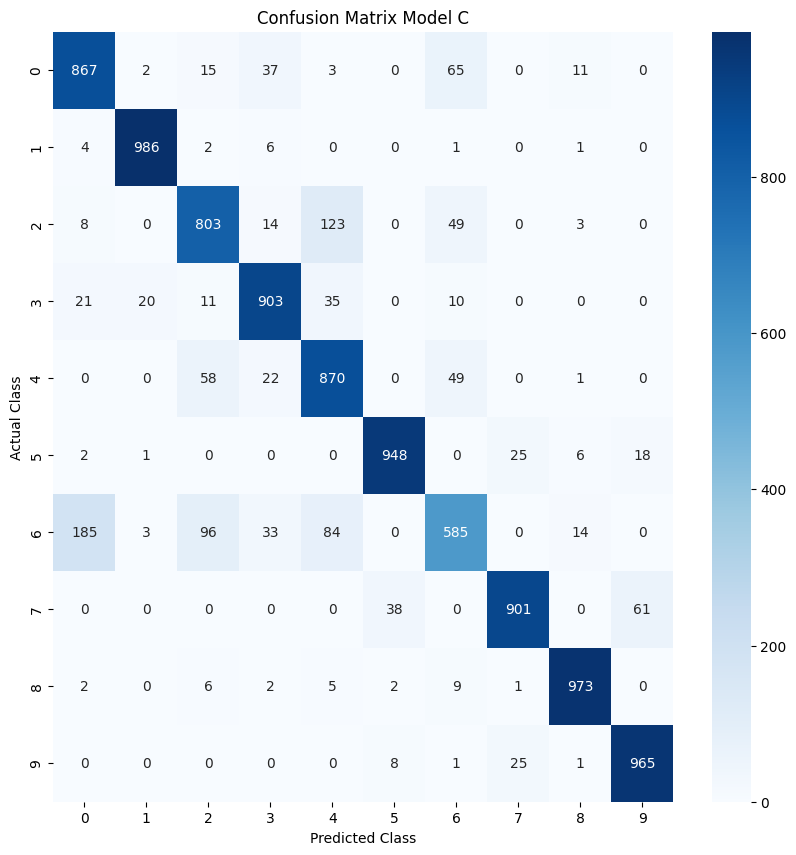

In [39]:
best_model_path = 'model_C_best.hdf5' 
best_model = load_model(best_model_path)

# Generate predictions
y_pred_probs = best_model.predict(features_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
accuracy = accuracy_score(target_test, y_pred)
precision = precision_score(target_test, y_pred, average='macro')
recall = recall_score(target_test, y_pred, average='macro')
f1 = f1_score(target_test, y_pred, average='macro')

print(f'Model Evaluation Metrics:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Classification report
print('\nClassification Report:')
print(classification_report(target_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(target_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix Model C')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


313/313 [==============================] - 1s 2ms/step
Model Evaluation Metrics:
Accuracy: 0.8885
Precision: 0.8896
Recall: 0.8885
F1 Score: 0.8889

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1000
           1       0.99      0.98      0.99      1000
           2       0.81      0.79      0.80      1000
           3       0.92      0.91      0.92      1000
           4       0.84      0.83      0.84      1000
           5       0.96      0.95      0.96      1000
           6       0.68      0.72      0.70      1000
           7       0.94      0.92      0.93      1000
           8       0.97      0.98      0.97      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



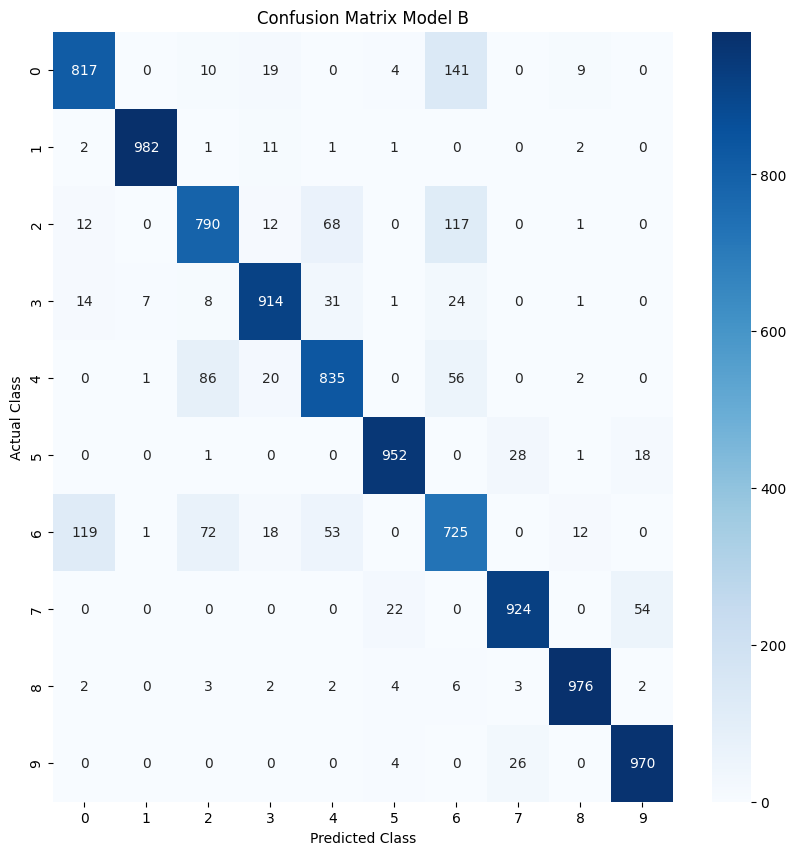

In [38]:
best_model_path = 'model_B_best.hdf5' 
best_model = load_model(best_model_path)

# Generate predictions
y_pred_probs = best_model.predict(features_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
accuracy = accuracy_score(target_test, y_pred)
precision = precision_score(target_test, y_pred, average='macro')
recall = recall_score(target_test, y_pred, average='macro')
f1 = f1_score(target_test, y_pred, average='macro')

print(f'Model Evaluation Metrics:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Classification report
print('\nClassification Report:')
print(classification_report(target_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(target_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix Model B')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


313/313 [==============================] - 1s 2ms/step
Model Evaluation Metrics:
Accuracy: 0.8580
Precision: 0.8568
Recall: 0.8580
F1 Score: 0.8571

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.97      0.97      0.97      1000
           2       0.78      0.80      0.79      1000
           3       0.88      0.88      0.88      1000
           4       0.81      0.78      0.79      1000
           5       0.93      0.90      0.92      1000
           6       0.67      0.61      0.64      1000
           7       0.90      0.90      0.90      1000
           8       0.94      0.96      0.95      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



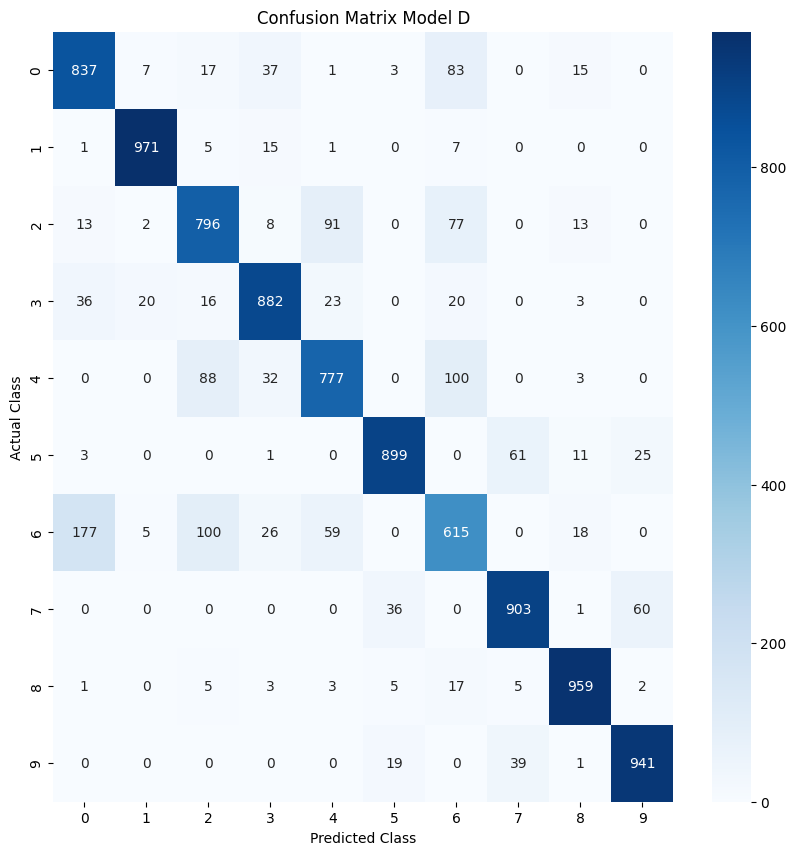

In [37]:
best_model_path = 'model_D_best.hdf5'  
best_model = load_model(best_model_path)

# Generate predictions
y_pred_probs = best_model.predict(features_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
accuracy = accuracy_score(target_test, y_pred)
precision = precision_score(target_test, y_pred, average='macro')
recall = recall_score(target_test, y_pred, average='macro')
f1 = f1_score(target_test, y_pred, average='macro')

print(f'Model Evaluation Metrics:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Classification report
print('\nClassification Report:')
print(classification_report(target_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(target_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix Model D')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


#### Evaluation:

| Model | Accuracy | Precision | Recall | F1 Score | Confusion Matrix Insight |
|-------|----------|-----------|--------|----------|-------------------------|
| Baseline | 0.8875   | 0.8884    | 0.8875 | 0.8866   | Well-balanced but with some misclassifications in classes 0 and 6. |
| B       | 0.8885   | 0.8896    | 0.8885 | 0.8889   | Similar to Baseline with slight improvements, especially in class 6. |
| C       | 0.8801   | 0.8792    | 0.8801 | 0.8780   | Some struggles with class 6, better handling of class 2 than Baseline. |
| D       | 0.8580   | 0.8568    | 0.8580 | 0.8571   | Underperforms in several classes, notably classes 2, 4, and 6. |

From the confusion matrices, we can glean that:

- **Model B** showed a high number of correct predictions across most classes and relatively fewer misclassifications for classes where other models struggled, such as class 6.
- **Model C** had difficulty with class 6 and some misclassifications between classes 2 and 4 but performed better than the baseline in class 2.
- **Model D** underperformed compared to the other models, with more pronounced misclassifications in classes such as 2, 4, and 6.

From the metrics:
- **Accuracy**: Model B has the highest accuracy among the models, indicating it correctly classified a slightly higher proportion of the test images.
- **Precision**: Model B also has the highest precision, suggesting that when it predicts a class label, it is correct more often than the other models.
- **Recall**: Similar to accuracy, Model B leads in recall, meaning it is best at finding all relevant instances of each class.
- **F1 Score**: Model B achieves the highest F1 score, which is a balance between precision and recall and is often more useful than accuracy, especially if the class distribution is uneven.

Based on the numerical metrics, Model B is consistently performing slightly better than the baseline and the other models across all key metrics.
Integrating both the confusion matrix insights and the evaluation metrics, **Model B** stands out as the best performing model. It not only scored highest on the key metrics but also showed a more reliable and consistent performance across different classes, which is important for a well-rounded model. Model B would be the recommended model to proceed with.
Therefore, Model B would be the best model to choose out of the ones evaluated. It not only provides better overall performance on the test data, but its metrics suggest that it has found a good balance between precision and recall, which is crucial for a model that is robust and reliable across a variety of potential inputs.